In [1]:
import pandas as pd
import numpy as np
from keras import layers, optimizers, models, datasets, callbacks
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

Using TensorFlow backend.


## Import Dati

In [2]:
mnist = datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


5


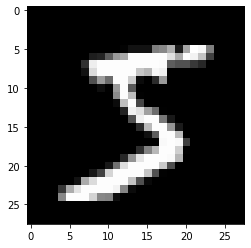

In [0]:
plt.imshow(X_train[0], cmap = "gray")
print(y_train[0])

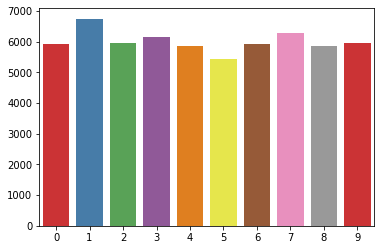

In [0]:
target = pd.DataFrame(y_train)
target.columns = ["TARGET"]

sns.barplot(target["TARGET"].value_counts().index, target["TARGET"].value_counts().values, palette="Set1")

## Reshape e normalizzazione

In [0]:
IMG_SIZE = 28
X_train = X_train.reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X_train = X_train/255.0

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test/255.0


## Rete neurale

In [0]:
es = callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))


model.add(layers.Conv2D(16, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(8, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 16)       

In [0]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = optimizers.rmsprop(lr=0.0001),
              metrics = ["acc"])

In [0]:
history = model.fit(X_train, y_train, 
          batch_size = 64, 
          epochs = 100, 
          validation_split = 0.3,
          callbacks = [es])

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 12s 286us/step - loss: 2.2492 - acc: 0.3879 - val_loss: 0.6375 - val_acc: 0.8039
Epoch 2/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.8732 - acc: 0.7100 - val_loss: 0.2979 - val_acc: 0.9167
Epoch 3/100
42000/42000 [==============================] - 10s 236us/step - loss: 0.5031 - acc: 0.8368 - val_loss: 0.1989 - val_acc: 0.9428
Epoch 4/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.3566 - acc: 0.8882 - val_loss: 0.1523 - val_acc: 0.9552
Epoch 5/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.2790 - acc: 0.9139 - val_loss: 0.1272 - val_acc: 0.9619
Epoch 6/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.2371 - acc: 0.9266 - val_loss: 0.1102 - val_acc: 0.9668
Epoch 7/100
42000/42000 [==============================] - 10s 239us/step - loss: 0.2047 - acc: 0.9360 - val_l

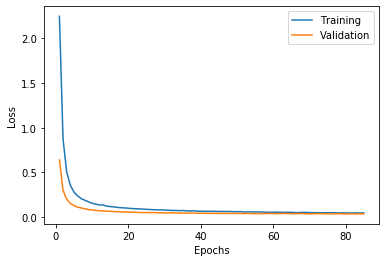

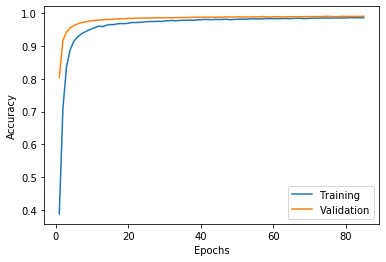

In [0]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    
plot_history(history)

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)

10000/10000 [==============================] - 1s 120us/step
TEST LOSS: 0.026889830066691503
TEST ACCURACY: 0.9913


In [0]:
y_test_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

